In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv(r"/StudentsPerformance_exam1.csv")

In [16]:
#revisamos el dataset y los valores unicos de las variables string
print(data)
print(data["gender"].unique())
print(data["parental level of education"].unique())
print(data["lunch"].unique())
print(data["parental level of education"].unique())
print(data["test preparation course"].unique())

         gender race/ethnicity parental level of education         lunch  \
0    non-binary        group B           bachelor's degree      standard   
1        female        group C                some college      standard   
2        female        group B             master's degree      standard   
3          male        group A          associate's degree  free/reduced   
4          male        group C                some college      standard   
..          ...            ...                         ...           ...   
995      female        group E             master's degree      standard   
996        male        group C                 high school  free/reduced   
997      female        group C                 high school  free/reduced   
998         NaN        group D                some college      standard   
999      female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0              

In [18]:
#eliminamos NAN
datac=data.dropna()

In [19]:
datac
#el set quedo con solo 670 datos, pero evita la posibilidad de cometer sesgos por imputacion de datos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0
...,...,...,...,...,...,...,...,...
990,male,group E,high school,free/reduced,completed,86.0,81.0,75.0
991,non-binary,group B,some high school,standard,completed,65.0,82.0,78.0
992,non-binary,group D,associate's degree,free/reduced,none,55.0,76.0,76.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0


In [21]:
# hallamos los promedios para cada score
math=datac["math score"].mean()
read=datac["reading score"].mean()
writ=datac["writing score"].mean()

In [22]:
print(math," ", read, " ", writ)

66.26567164179104   69.54477611940298   68.47164179104477


(array([  2.,   1.,   6.,  19.,  68., 122., 170., 142., 100.,  40.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

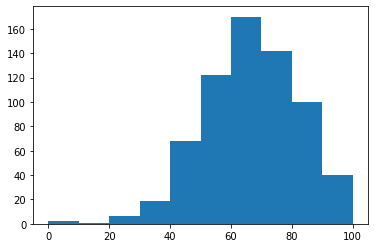

In [25]:
plt.hist(datac["math score"])

(array([  4.,   4.,  13.,  42.,  96., 114., 152., 117.,  88.,  40.]),
 array([ 17. ,  25.3,  33.6,  41.9,  50.2,  58.5,  66.8,  75.1,  83.4,
         91.7, 100. ]),
 <a list of 10 Patch objects>)

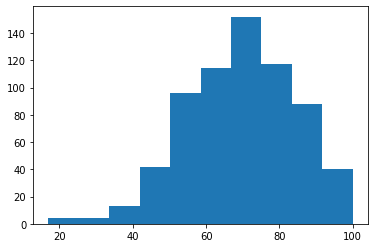

In [26]:
plt.hist(datac["reading score"])

(array([  2.,   3.,   8.,  37.,  84., 104., 146., 151.,  84.,  51.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

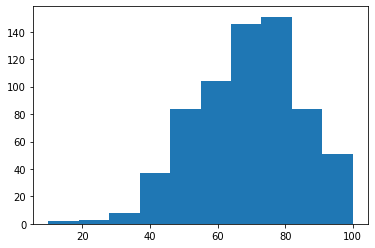

In [27]:
plt.hist(datac["writing score"])

In [30]:
#hallamos la correlación entre las variables relevantes
datac[['writing score',"reading score","math score"]].corr()

,writing score,reading score,math score
writing score,1.000000,0.956514,0.806391
reading score,0.956514,1.000000,0.821609
math score,0.806391,0.821609,1.000000


In [32]:
#agrupamos por género para ver los datos de matematicas
gen=datac.groupby(["gender"]).mean()
gen

,math score,reading score,writing score
gender,,,
female,63.647841,72.774086,72.684385
male,68.383764,65.354244,63.472325
non-binary,68.448980,71.214286,69.357143


In [40]:
#organizamos los datos para sacar percentiles y hallamos el resultado de escritura que mas se acerca a el percentil 85
datac.sort_values(["writing score"])
per85=len(datac.index)*0.85
pun85=datac.iloc[int(per85)]["writing score"]
pun85

96.0

In [49]:
#dividimos el dataset, esto se pudo hacer mas directamente, pero me parecía menos transparente :o
datapl85=datac[datac["writing score"]>=pun85]
res=datapl85.groupby("parental level of education").count().reset_index()

print(res)
# esto sobra pero quería ver como era para el resto de la población
restod=datac.groupby("parental level of education").count().reset_index()
print(restod)

  parental level of education  gender  race/ethnicity  lunch  \
0           bachelor's degree       8               8      8   
1                 high school       1               1      1   
2             master's degree       5               5      5   
3                some college       4               4      4   
4            some high school       1               1      1   

   test preparation course  math score  reading score  writing score  
0                        8           8              8              8  
1                        1           1              1              1  
2                        5           5              5              5  
3                        4           4              4              4  
4                        1           1              1              1  
  parental level of education  gender  race/ethnicity  lunch  \
0          associate's degree     150             150    150   
1           bachelor's degree      80              80     80 

In [58]:
#filtramos los estudiantes de mas de 90
data90=datac[(datac["writing score"]>=90) & (datac["math score"]>=90) & (datac["reading score"]>=90)]
#hallamos cuantos sacaron más de 90
print(len(data90))
#encontramos cuantos de estos tuvieron un test de preparación completo
estu=data90.groupby("test preparation course").count()
print(estu)

21
                         gender  race/ethnicity  parental level of education  \
test preparation course                                                        
completed                    12              12                           12   
none                          9               9                            9   

                         lunch  math score  reading score  writing score  
test preparation course                                                   
completed                   12          12             12             12  
none                         9           9              9              9  
